In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
df = pd.read_csv('placement.csv')

df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

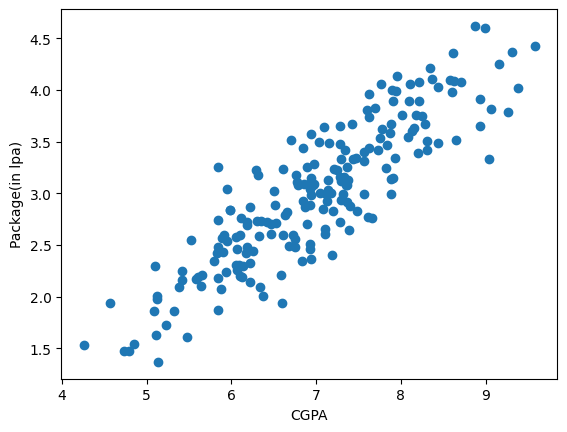

In [32]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [33]:
X = df.iloc[:, :1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [34]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

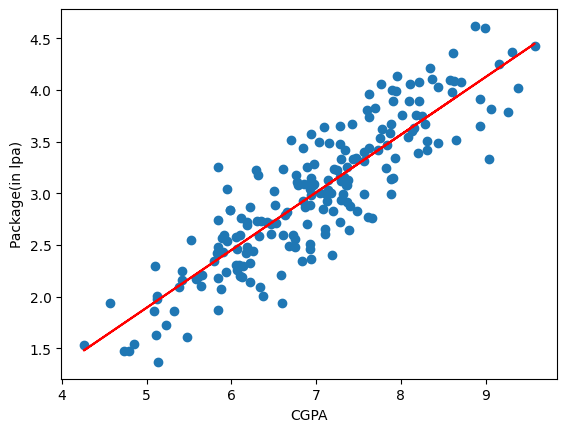

In [35]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [36]:
y_pred = lr.predict(X_test)

y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [37]:
print("MAE", mean_absolute_error(y_test, y_pred))  # LPA unit

MAE 0.2884710931878175


In [38]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [39]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))  # LPA unit

RMSE 0.34827051717731616


In [40]:
print("MSE", r2_score(y_test, y_pred))  # percentage
r2 = r2_score(y_test, y_pred)

MSE 0.780730147510384


In [41]:
# Adjusted R2
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [42]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.591789,3.26
1,5.12,0.876765,1.98
2,7.82,0.593797,3.25
3,7.42,0.817568,3.67
4,6.94,0.674414,3.57


Text(0, 0.5, 'Package(in lpa)')

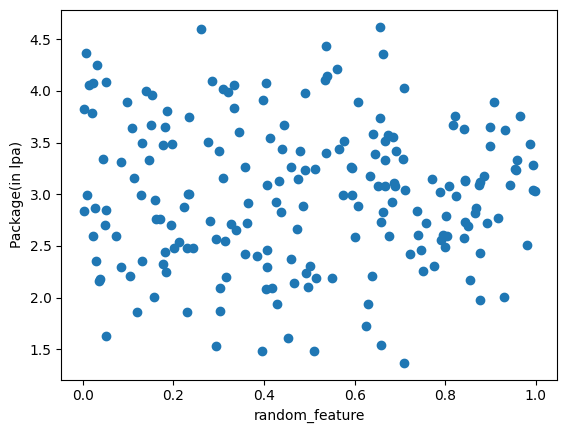

In [43]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [44]:
X = new_df1.iloc[:, :2]
y = new_df1.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [45]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(X_test)

y_pred

array([3.8736151 , 3.14702634, 2.37216967, 2.53858034, 1.6618376 ,
       1.77228233, 2.02768228, 2.92214189, 3.7742718 , 2.88697247,
       4.14124652, 3.47651643, 2.96984798, 2.34796766, 3.19810451,
       3.48052166, 1.91054031, 3.2802447 , 2.97252339, 3.44056693,
       2.52869899, 3.13340128, 2.87812924, 3.14023059, 3.67894281,
       2.9015218 , 3.51349337, 3.31332446, 3.87657216, 2.00244516,
       3.69229036, 3.19795421, 3.721116  , 2.77860041, 2.73822158,
       3.2252667 , 3.55427481, 2.66156564, 2.62042373, 2.7451591 ])

In [47]:
print("R2 score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 score 0.7828530601223787


In [48]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7711153876965613

In [49]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12, 12, 200)/10)

new_df2 = new_df2[['cgpa', 'iq', 'package']]

new_df2.head()

,cgpa,iq,package
0,6.89,4.26,3.26
1,5.12,0.88,1.98
2,7.82,3.95,3.25
3,7.42,3.57,3.67
4,6.94,2.77,3.57


Text(0, 0.5, 'Package(in lpa)')

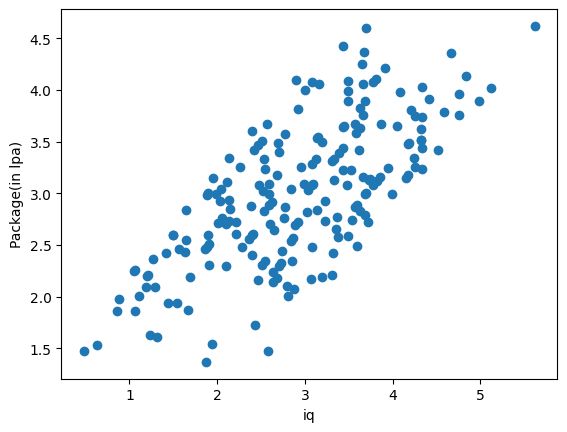

In [50]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [51]:
X = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [52]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [53]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8109500726335342


In [54]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8007311576407523